In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('ExploratoryData.csv')

In [6]:
data=df
data.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [7]:
#converting categorcal variables to numeric using LabelEncoder
from sklearn import preprocessing

In [8]:
le=preprocessing.LabelEncoder()
Gender_df=le.fit_transform(data.Gender)
Property_Area_df=le.fit_transform(data.Property_Area)
Married_df=le.fit_transform(data.Married)
Education_df=le.fit_transform(data.Education)
Self_Employed_df=le.fit_transform(data.Self_Employed)
Loan_Status_df=le.fit_transform(data.Loan_Status)
Dependents_df=le.fit_transform(data.Dependents)


In [9]:
enc=data
enc['Gender']=Gender_df
enc['Property_Area']=Property_Area_df
enc['Married']=Married_df
enc['Education']=Education_df
enc['Self_Employed']=Self_Employed_df
enc['Loan_Status']=Loan_Status_df
enc['Dependents']=Dependents_df


In [10]:
enc.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [11]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [12]:
#choosing relevant variables
df_model=enc
df_model=df[['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']]

In [13]:
df_model.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,0.817690,0.653430,0.759928,0.222022,0.137184,5267.059567,1585.575668,144.969009,341.956679,0.843348,1.030686,0.689531
std,0.386449,0.476308,1.010855,0.415981,0.344353,5455.163295,2524.484889,81.078416,64.727653,0.349310,0.786962,0.463104
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2843.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3839.500000,1149.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5818.750000,2297.250000,166.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,650.000000,480.000000,1.000000,2.000000,1.000000


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [16]:
#train test split
X=df_model.drop('Loan_Status',axis=1)
y=df_model.Loan_Status.values


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=100)

In [18]:
X.shape

(554, 11)

In [19]:
y.shape

(554,)

In [20]:
#applying naive bayes algorithm for classification
BernNB=BernoulliNB(binarize=.1)
BernNB.fit(X_train,y_train)
print(BernNB)
y_expect=y_test
y_pred=BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred)*100)

BernoulliNB(binarize=0.1)
80.32786885245902


In [21]:
#applying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [22]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [23]:
y_predict=clf.predict(X_test)
y_predict
print("Accuracy is",accuracy_score(y_test,y_predict)*100)

Accuracy is 74.31693989071039


In [24]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression

In [25]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_preds=logreg.predict(X_test)
print("Accuracy is",accuracy_score(y_test,y_preds)*100)

Accuracy is 78.68852459016394


In [26]:
#creating a confusion matrix so as to obtain a summary of prediction results of NaiveBayes Classifier
from sklearn import metrics
cn_matrix=metrics.confusion_matrix(y_test,y_pred)
cn_matrix

array([[ 27,  34],
       [  2, 120]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

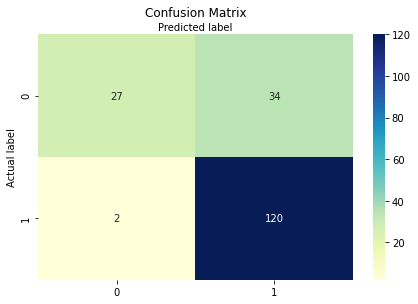

In [27]:
import seaborn as sns
%matplotlib inline
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#creating a heatmap
sns.heatmap(pd.DataFrame(cn_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8032786885245902
Precision: 0.7792207792207793
Recall: 0.9836065573770492
